**Analisi Esplorativa dei Dati (Sheet3)**<br>
Carichiamo il dataset dal foglio "Sheet3" e diamo un'occhiata alle prime righe per comprendere la struttura dei dati.

In [ ]:
import pandas as pd

# Carica i dati
file_path = 'temp_humid_data.xlsx'
sheet1_data = pd.read_excel(file_path, sheet_name='Sheet1')
sheet3_data = pd.read_excel(file_path, sheet_name='Sheet3')

# Visualizzazione delle prime righe del dataset
print(sheet1_data.head())
print(sheet3_data.head())


         time  temperature_mean  relativehumidity_mean
0  2022-01-01             11.22                     77
1  2022-01-02              9.87                     86
2  2022-01-03              9.33                     79
3  2022-01-04             11.05                     72
4  2022-01-05             10.17                     73
        Date  no. of Adult males  temperature_mean  relativehumidity_mean
0 2023-06-15                   1             24.62                     45
1 2023-06-16                   1             26.79                     46
2 2023-06-17                   0             26.02                     53
3 2023-06-18                   1             25.04                     48
4 2023-06-19                   0             25.09                     43


**Preparazione dei Dati**<br>
Convertiamo la colonna 'Date' in formato datetime. Ciò ci aiuterà nell'analisi delle serie temporali.

In [ ]:
# Converto le colonne di data in datetime
sheet1_data.rename(columns={'time': 'Date'}, inplace=True)
sheet1_data['Date'] = pd.to_datetime(sheet1_data['Date'])
sheet3_data['Date'] = pd.to_datetime(sheet3_data['Date'])


In [ ]:
s1 = sheet1_data.copy()
s1.set_index(['Date'] , inplace =True)
s1

,temperature_mean,relativehumidity_mean
Date,,
2022-01-01,11.22,77
2022-01-02,9.87,86
2022-01-03,9.33,79
2022-01-04,11.05,72
2022-01-05,10.17,73
...,...,...
2022-12-27,10.42,82
2022-12-28,10.29,92
2022-12-29,10.69,74


In [ ]:
s3 = sheet3_data.copy()
s3.set_index(['Date'] , inplace =True)
s3

,no. of Adult males,temperature_mean,relativehumidity_mean
Date,,,
2023-06-15,1,24.62,45
2023-06-16,1,26.79,46
2023-06-17,0,26.02,53
2023-06-18,1,25.04,48
2023-06-19,0,25.09,43
...,...,...,...
2023-09-24,0,18.19,50
2023-09-25,2,17.75,73
2023-09-26,0,17.70,77


**Pulizia dei Dati**<br>Verifico la presenza di Missing Value e nel caso elimino le righe che li contengono.

In [ ]:
print(f'Sheet 1 - I missing value per ogni attributo sono : \n{s1.isna().sum()} ')
print(f'Start time: ' + sheet1_data.Date.min().strftime('%Y-%m-%d'))
print(f'End time: ' + sheet1_data.Date.max().strftime('%Y-%m-%d') )
print(f'\n\nSheet 3 - I missing value per ogni attributo sono : \n{s3.isna().sum()} ')
print(f'Start time: ' + sheet3_data.Date.min().strftime('%Y-%m-%d'))
print(f'End time: ' + sheet3_data.Date.max().strftime('%Y-%m-%d') )

Sheet 1 - I missing value per ogni attributo sono : 
temperature_mean         0
relativehumidity_mean    0
dtype: int64 
Start time: 2022-01-01
End time: 2022-12-31


Sheet 3 - I missing value per ogni attributo sono : 
no. of Adult males       0
temperature_mean         0
relativehumidity_mean    0
dtype: int64 
Start time: 2023-06-15
End time: 2023-09-28


In [ ]:
# Pulizia dei dati (gestione dei valori mancanti, ecc.)
s1 = s1.dropna() # Rimuove righe con valori mancanti
s3 = s3.dropna() # Rimuove righe con valori mancanti

**Analisi di base**<br>
Analisi descrittiva

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kstest, ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns

def compare_datasets_statistics(df1, df2):
    """
    Compare the statistical properties of two dataframes 'df1' and 'df2'.
    Performs statistical tests on common columns to check if they come from the same distribution.
    Returns two tables with statistical summaries and comparison results.
    """
    def get_statistics(df):
        stats = df.describe().T
        stats['Skewness'] = df.skew()
        stats['Kurtosis'] = df.kurtosis()
        return stats

    def compare_columns(df1, df2, common_columns):
        comparison_results = {}
        for column in common_columns:
            if df1[column].dtype in [np.float64, np.int64] and df2[column].dtype in [np.float64, np.int64]:
                stat, p = ks_2samp(df1[column].dropna(), df2[column].dropna())
                comparison_results[column] = {'KS Statistic': stat, 'P-Value': p}
        return pd.DataFrame(comparison_results).T

    stats_df1 = get_statistics(df1)
    stats_df2 = get_statistics(df2)

    common_columns = set(df1.columns).intersection(set(df2.columns))
    comparison_results_df = compare_columns(df1, df2, common_columns)

    return stats_df1 , stats_df2 , comparison_results_df

stats_df1 , stats_df2 , comparison_results_df = compare_datasets_statistics(s1, s3)

print(f' statistical analysis of the first dataset 1\n {stats_df1}  \n \n statistical analysis of the second dataset\n {stats_df2} \n \n the Kolmogorov - Smirnov test between common column is \n {comparison_results_df}')

 statistical analysis of the first dataset 1
                        count       mean        std    min    25%    50%  \
temperature_mean       365.0  16.038740   7.965726   1.33   9.15  15.41   
relativehumidity_mean  365.0  61.249315  15.660750  26.00  50.00  61.00   

                         75%    max  Skewness  Kurtosis  
temperature_mean       23.41  32.41  0.096121 -1.266360  
relativehumidity_mean  72.00  94.00 -0.011114 -0.638466    
 
 statistical analysis of the second dataset
                        count       mean        std    min    25%    50%  \
no. of Adult males     106.0   0.415094   1.120101   0.00   0.00   0.00   
temperature_mean       106.0  25.015566   3.768792  14.03  23.70  25.64   
relativehumidity_mean  106.0  50.283019  11.928162  26.00  41.25  51.50   

                           75%    max  Skewness   Kurtosis  
no. of Adult males      0.0000   6.00  3.304269  11.802826  
temperature_mean       27.2975  32.41 -1.023589   0.944560  
relativehumidity_mean

**Visualizzazione dati Sheet1**<br>Utilizzeremo grafici per visualizzare le tendenze e le relazioni nei dati. In particolare, per lo Sheet1, ciò include grafici della temperatura e dell'umidità nel tempo

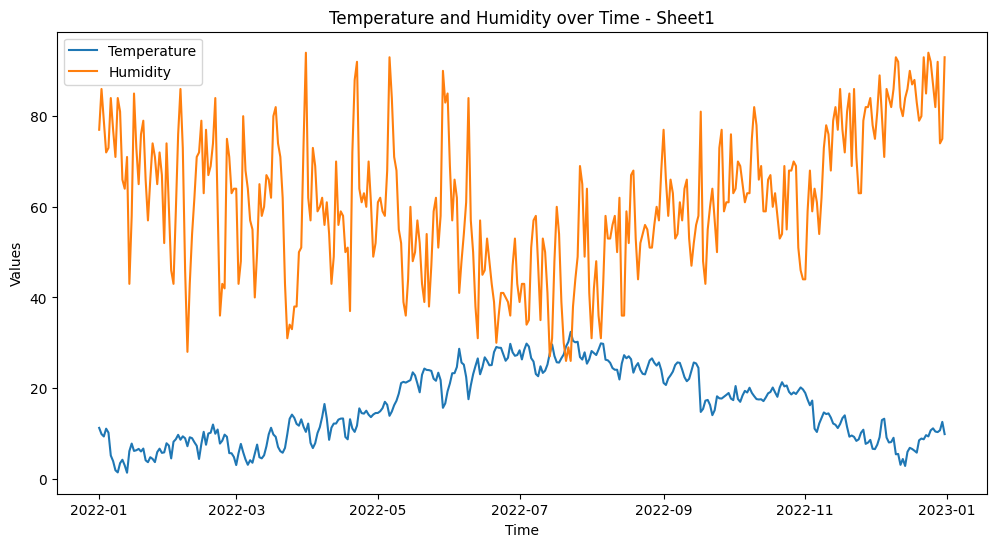

In [ ]:
import matplotlib.pyplot as plt

# Visualizzazione dei dati di Sheet1
plt.figure(figsize=(12, 6))
plt.plot(sheet1_data['Date'], sheet1_data['temperature_mean'], label='Temperature')
plt.plot(sheet1_data['Date'], sheet1_data['relativehumidity_mean'], label='Humidity')
plt.title('Temperature and Humidity over Time - Sheet1')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

**Visualizzazione dati Sheet3**<br>
Visualizzazione della relazione tra la temperatura e il numero di maschi adulti. Per comprendere meglio l'impatto combinato della temperatura e dell'umidità sul numero di maschi adulti, esploreremo i dati attraverso una visualizzazione tridimensionale. Questo ci aiuterà a visualizzare la relazione tra temperatura, umidità e il numero di maschi adulti.

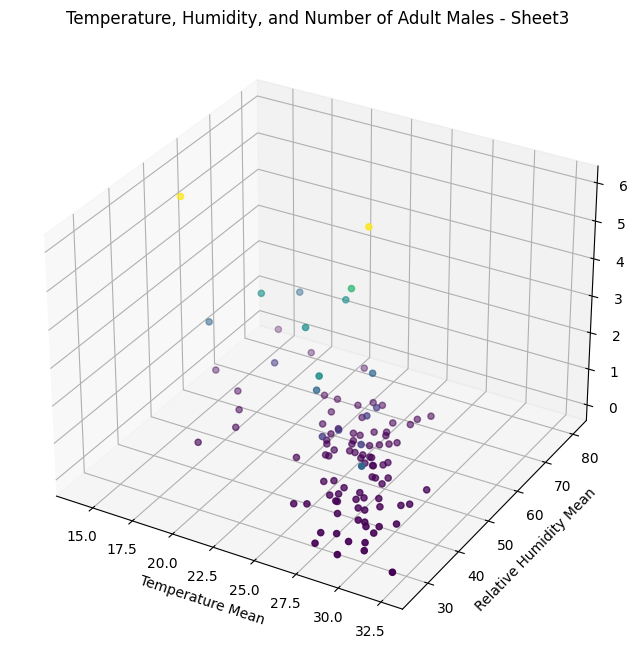

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Creazione di un grafico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Assegni i dati ai rispettivi assi
x = s3['temperature_mean']
y = s3['relativehumidity_mean']
z = s3['no. of Adult males']

# Grafico
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')
ax.set_xlabel('Temperature Mean')
ax.set_ylabel('Relative Humidity Mean')
ax.set_zlabel('Number of Adult Males')

# Titolo e visualizzazione
plt.title('Temperature, Humidity, and Number of Adult Males - Sheet3')
plt.show()

**Visualizzazione 3D Interattiva** <br>Alternativamente, per una rappresentazione più dinamica e interattiva, possiamo creare un grafico 3D interattivo utilizzando librerie come *plotly*. Questo permetterà di esplorare i dati da diverse angolazioni e di avere una visione più completa delle relazioni tra le variabili.

In [ ]:
import plotly.express as px

# Creazione di un grafico di dispersione 3D con superficie
fig = px.scatter_3d(s3, x='temperature_mean', y='relativehumidity_mean', z='no. of Adult males',
                    color='no. of Adult males', opacity=0.7, size_max=15)

fig.update_layout(title='3D Scatter Plot with Surface: Temperature, Humidity, and Number of Adult Males - Sheet3',
                  scene=dict(xaxis_title='Temperature Mean',
                             yaxis_title='Relative Humidity Mean',
                             zaxis_title='Number of Adult Males'))

fig.show()


**Chiarimento Visualizzazione Sheet3**<br>Per esplorare in modo più dettagliato la relazione tra temperatura, umidità e numero di maschi adulti, creeremo tre grafici bidimensionali. Ogni grafico metterà in evidenza la relazione tra due delle variabili, permettendoci di capire come interagiscono tra loro.

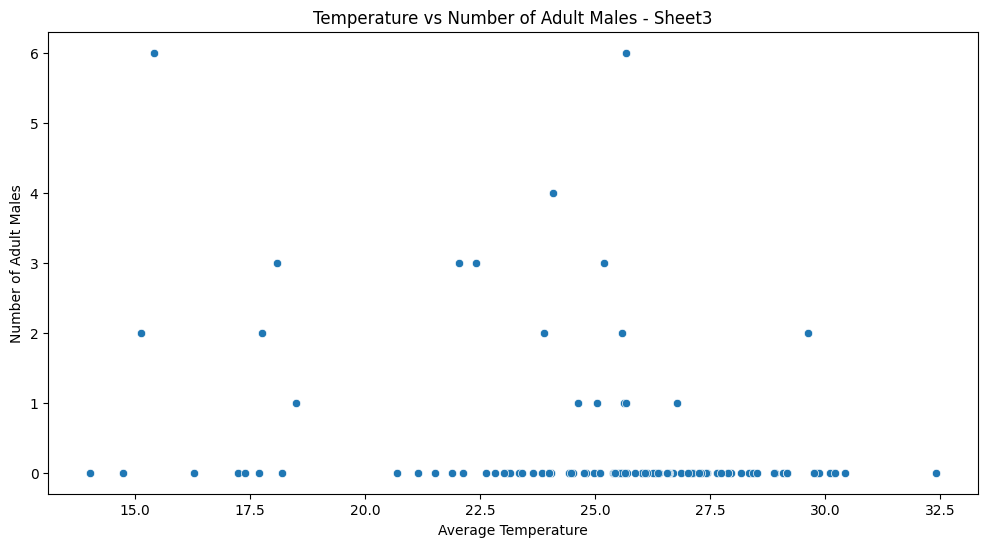

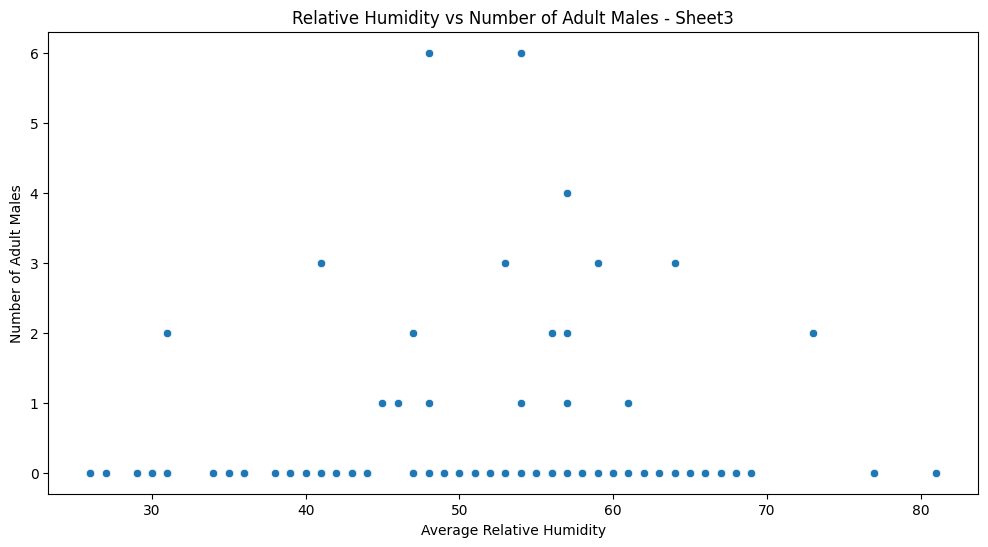

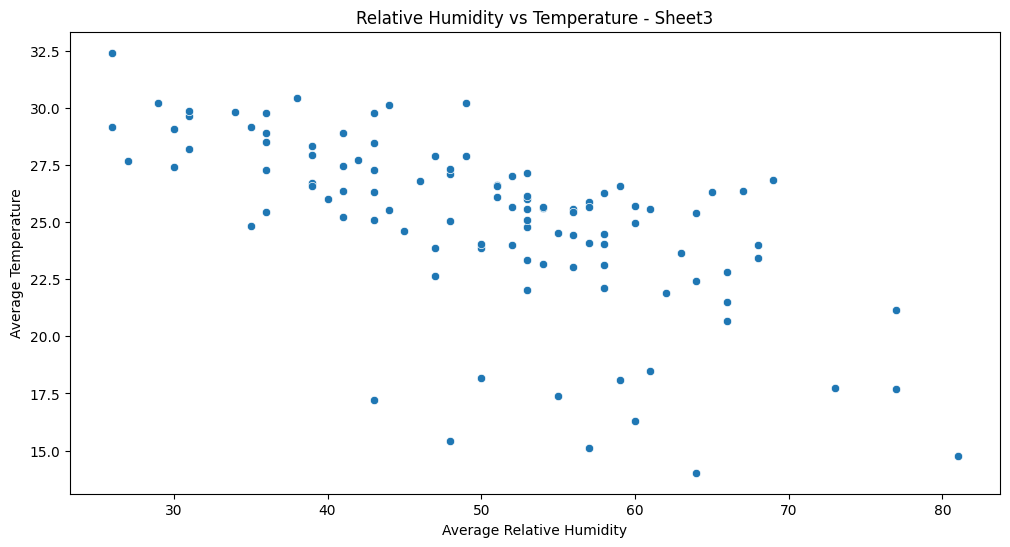

In [ ]:
import seaborn as sns


# Grafico della temperatura vs numero di maschi adulti
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temperature_mean', y='no. of Adult males', data=s3)
plt.title('Temperature vs Number of Adult Males - Sheet3')
plt.xlabel('Average Temperature')
plt.ylabel('Number of Adult Males')
plt.show()

# Grafico dell'umidità vs numero di maschi adulti
plt.figure(figsize=(12, 6))
sns.scatterplot(x='relativehumidity_mean', y='no. of Adult males', data=s3)
plt.title('Relative Humidity vs Number of Adult Males - Sheet3')
plt.xlabel('Average Relative Humidity')
plt.ylabel('Number of Adult Males')
plt.show()

# Grafico dell'umidità vs temperatura
plt.figure(figsize=(12, 6))
sns.scatterplot(x='relativehumidity_mean', y='temperature_mean', data=s3)
plt.title('Relative Humidity vs Temperature - Sheet3')
plt.xlabel('Average Relative Humidity')
plt.ylabel('Average Temperature')
plt.show()

####Probability Plot
Il probability plot viene utilizzato per valutare quanto bene i dati seguono una distribuzione teorica (la distribuzione normale). Se i punti nel plot seguono approssimativamente una retta, ciò suggerisce che i dati seguono la distribuzione specificata.

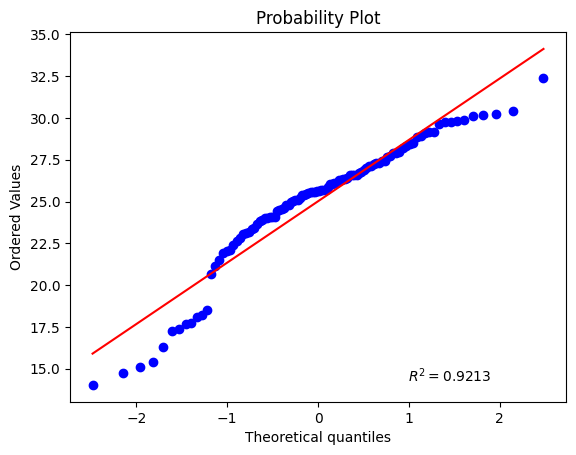

In [ ]:
import scipy.stats
import pylab

scipy.stats.probplot(s3.temperature_mean, plot= plt , fit = True, rvalue = True )

plt.show()

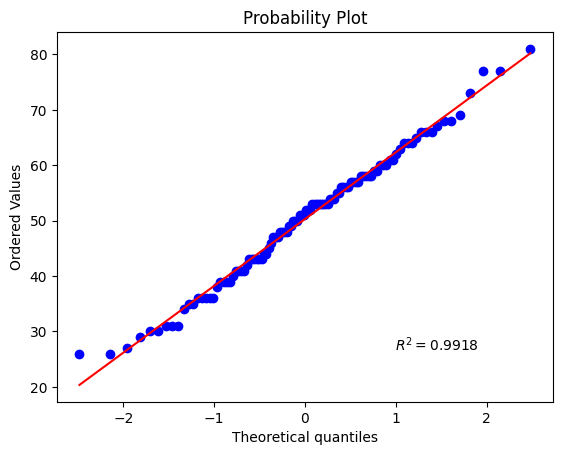

In [ ]:
scipy.stats.probplot(s3.relativehumidity_mean, plot= plt , fit = True, rvalue = True )
plt.show()

**Analisi di Serie Storiche (Sheet1)**<br>
L'analisi delle serie storiche ci permette di esaminare come certe variabili cambiano nel tempo. Nel nostro caso, possiamo analizzare le tendenze nella temperatura media e nell'umidità relativa media nel Sheet1. Questo tipo di analisi è particolarmente utile per identificare pattern stagionali, anomalie o cambiamenti a lungo termine nelle condizioni ambientali.

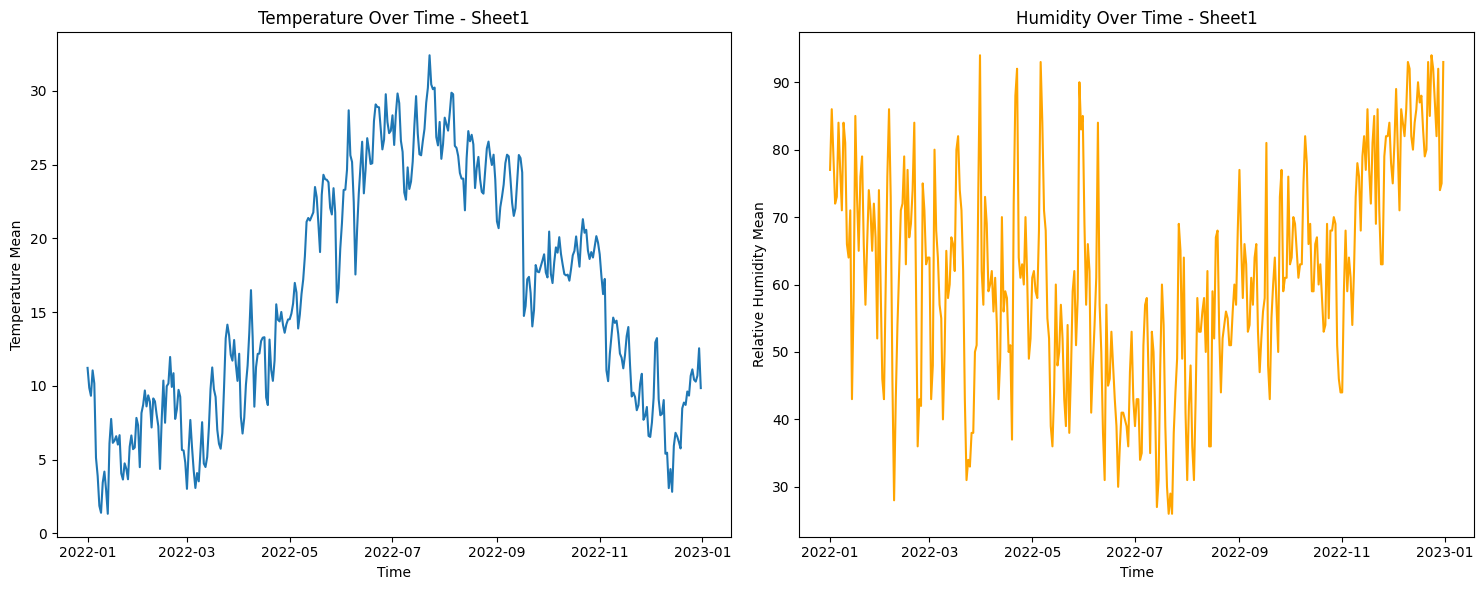

In [ ]:
# Analisi delle serie storiche per temperatura e umidità nel Sheet1
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(sheet1_data['Date'], sheet1_data['temperature_mean'])
plt.title('Temperature Over Time - Sheet1')
plt.xlabel('Time')
plt.ylabel('Temperature Mean')

plt.subplot(1, 2, 2)
plt.plot(sheet1_data['Date'], sheet1_data['relativehumidity_mean'], color='orange')
plt.title('Humidity Over Time - Sheet1')
plt.xlabel('Time')
plt.ylabel('Relative Humidity Mean')

plt.tight_layout()
plt.show()

In questi grafici, stiamo visualizzando le variazioni di temperatura e umidità nel tempo. Questo aiuta a identificare se ci sono periodi dell'anno con condizioni particolarmente estreme o se ci sono tendenze a lungo termine come l'aumento delle temperature medie o variazioni dell'umidità.

**Analisi di Serie Storiche (Sheet3)**<br>
Analogamente a quanto fatto per lo Sheet1, eseguiremo un'analisi delle serie storiche per lo Sheet3. In questo caso, ci concentreremo sulla variazione nel tempo del numero di maschi adulti in relazione alle variazioni di temperatura e umidità. Questo può rivelare pattern interessanti e aiutare a comprendere se ci sono correlazioni temporali tra le condizioni ambientali e la popolazione batterica.

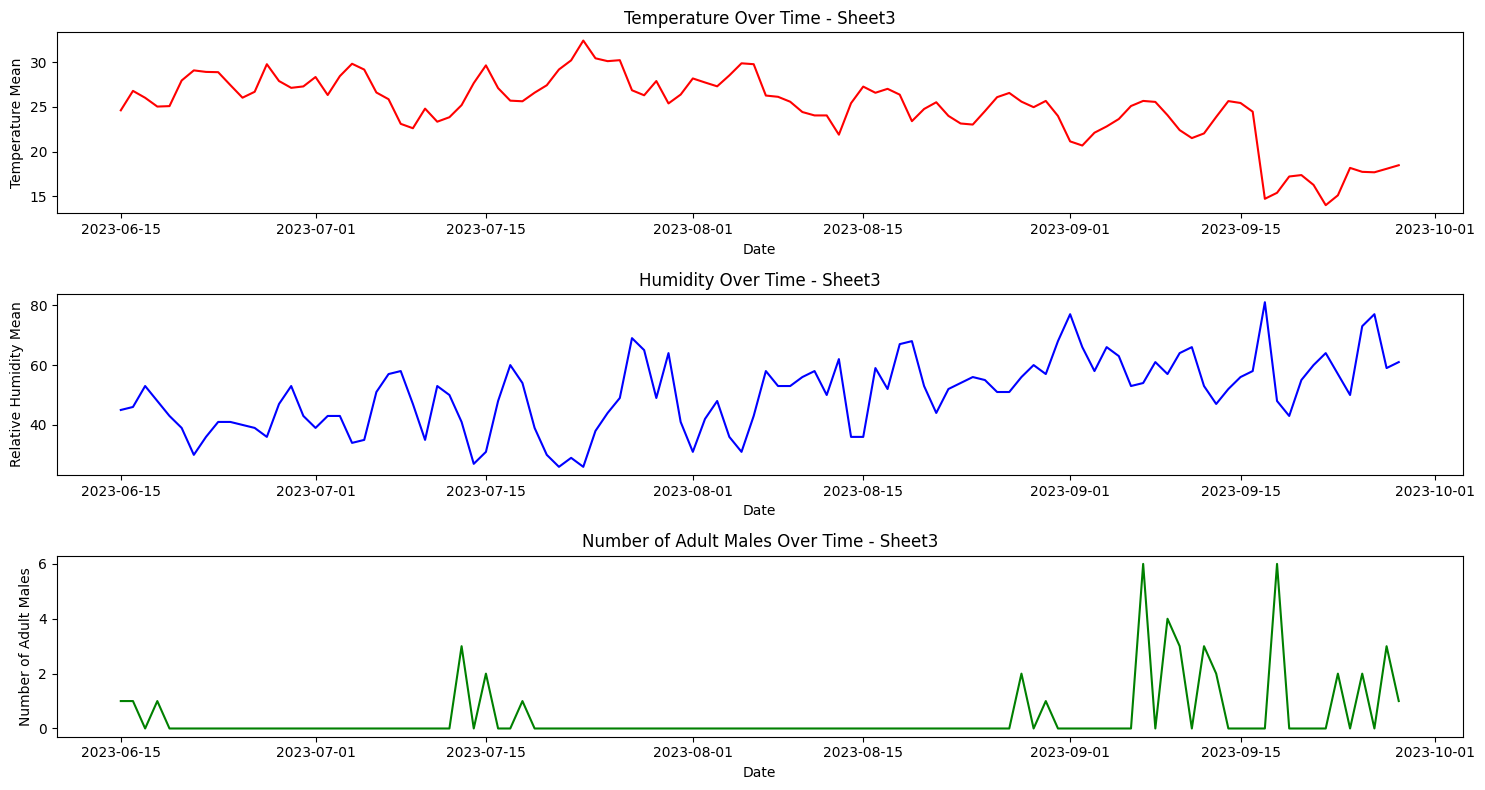

In [ ]:
# Grafico della temperatura, umidità e numero di maschi adulti nel tempo per Sheet3
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(sheet3_data['Date'], sheet3_data['temperature_mean'], color='red')
plt.title('Temperature Over Time - Sheet3')
plt.xlabel('Date')
plt.ylabel('Temperature Mean')

plt.subplot(3, 1, 2)
plt.plot(sheet3_data['Date'], sheet3_data['relativehumidity_mean'], color='blue')
plt.title('Humidity Over Time - Sheet3')
plt.xlabel('Date')
plt.ylabel('Relative Humidity Mean')

plt.subplot(3, 1, 3)
plt.plot(sheet3_data['Date'], sheet3_data['no. of Adult males'], color='green')
plt.title('Number of Adult Males Over Time - Sheet3')
plt.xlabel('Date')
plt.ylabel('Number of Adult Males')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Creazione di un grafico di serie temporali
fig = px.line(sheet3_data, x='Date', y=['temperature_mean', 'relativehumidity_mean', 'no. of Adult males'],
              title='Time Series: Temperature, Relative Humidity, and Number of Adult Males - Sheet3',
              labels={'value': 'Value', 'variable': 'Attribute'},
              line_shape='linear')

fig.update_layout(xaxis_title='Time', yaxis_title='Value')

fig.show()


Questi grafici ci permettono di osservare come la temperatura e l'umidità variano nel tempo e come queste variazioni possano essere correlate al numero di maschi adulti registrato. Analizzando queste tre serie temporali, possiamo iniziare a ipotizzare se esistano correlazioni o pattern stagionali che influenzano la popolazione batterica.

# STAZIONARIETA'

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, significance_level=0.005):
    # Test di Dickey-Fuller
    print('Risultati del test di Dickey-Fuller:')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' % key] = value

    print(df_output)

    # Stampa se la serie è stazionaria o non stazionaria
    if df_output['p-value'] <= significance_level:
        print("\nLa serie temporale è stazionaria.\n")
    else:
        print("\nLa serie temporale non è stazionaria.\n")

# Testare la stazionarietà per la temperatura media e l'umidità relativa media con soglia a 0.005
print("Analisi della stazionarietà per il numero di maschi adulti:")
test_stationarity(s3['no. of Adult males'])
print("Analisi della stazionarietà per la temperatura media:")
test_stationarity(s3['temperature_mean'])
print("\nAnalisi della stazionarietà per l'umidità relativa media:")
test_stationarity(s3['relativehumidity_mean'])


Analisi della stazionarietà per il numero di maschi adulti:
Risultati del test di Dickey-Fuller:
Test Statistic                 -1.748632
p-value                         0.406246
#Lags Used                      8.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64

La serie temporale non è stazionaria.

Analisi della stazionarietà per la temperatura media:
Risultati del test di Dickey-Fuller:
Test Statistic                  -1.798042
p-value                          0.381434
#Lags Used                       2.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64

La serie temporale non è stazionaria.


Analisi della stazionarietà per l'umidità relativa media:
Risultati del test di Dickey-Fuller:
Test Statistic           

#SEASONALITY


Analisi della seasonality per l'umidità relativa media:


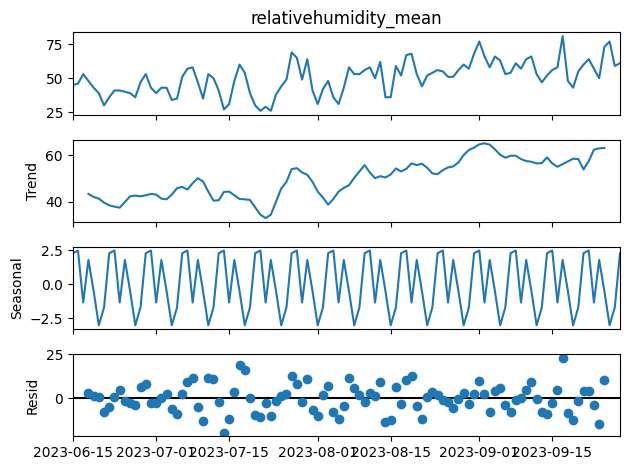


Analisi della seasonality per la temperatura relativa media:


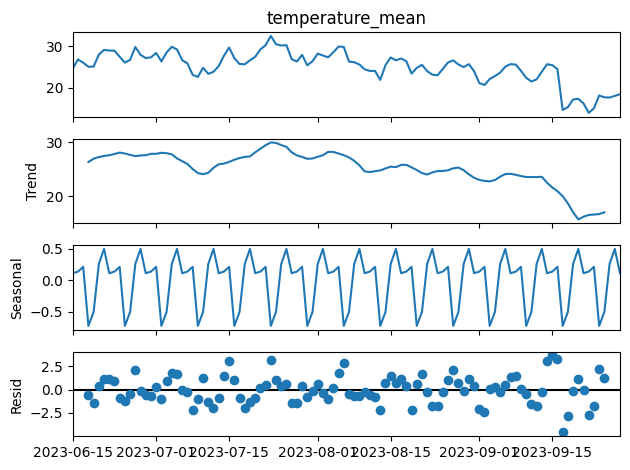


Analisi della seasonality per n° Adult males:


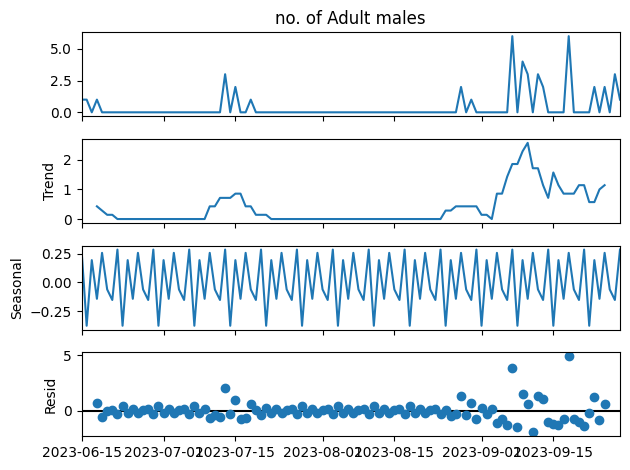

In [ ]:
# statstool library includes seasonal decomposition effects
from statsmodels.tsa.seasonal import seasonal_decompose

print("\nAnalisi della seasonality per l'umidità relativa media:")
humid_s_dec_additive = seasonal_decompose(s3.relativehumidity_mean, model = "additive")
# plot the graphs
humid_s_dec_additive.plot()
plt.show()

print("\nAnalisi della seasonality per la temperatura relativa media:")
temp_s_dec_additive = seasonal_decompose(s3.temperature_mean, model = "additive")
# plot the graphs
temp_s_dec_additive.plot()
plt.show()

print("\nAnalisi della seasonality per n° Adult males:")
s_dec_additive = seasonal_decompose(s3['no. of Adult males'], model = "additive")
# plot the graphs
s_dec_additive.plot()
plt.show()



# Autocorrelazione
####L'autocorrelazione è un concetto statistico che misura il grado di somiglianza tra una sequenza di valori in una serie temporale e i suoi stessi valori ritardati. In altre parole, quantifica la relazione tra un'osservazione in un certo momento e le osservazioni in momenti precedenti, fornendo informazioni su eventuali modelli temporali o dipendenze nei dati.

I picchi sul grafico indicano la forza dell'autocorrelazione a un dato ritardo. Picchi più alti indicano una correlazione più forte. Ad esempio, un picco a un ritardo di 3 potrebbe suggerire che i valori della serie temporale sono fortemente correlati con i valori ritardati di 3 periodi.
Mentre una lenta decrescita può indicare una componente stagionale nella serie temporale.
Nel nostro caso sono presenti dei picchi ma che non ci suggeriscono nessun pattern ricorsivo.

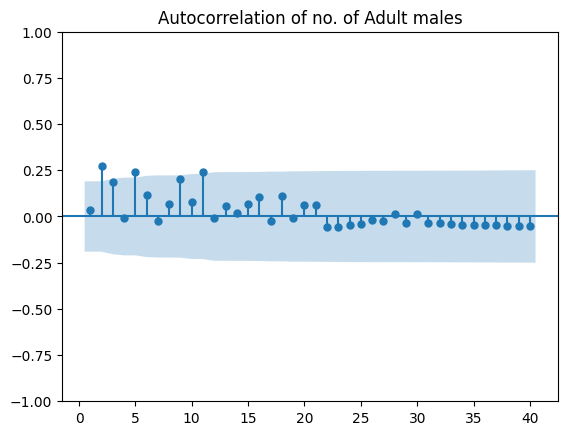

In [ ]:
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(s3['no. of Adult males'] , lags= 40 , zero =False , title = "Autocorrelation of no. of Adult males") #do not include the actual value
plt.show()

#Partial Autocorrelation
#####Funzione di Autocorrelazione Parziale (PACF): Misura la correlazione tra una serie temporale e le sue versioni ritardate, ma dopo aver eliminato le variazioni già spiegate dalle comparazioni intermedie. Ad esempio, la PACF a un ritardo di 2 misurerebbe la correlazione tra la serie e la sua versione ritardata di due punti temporali, eliminando gli effetti dei ritardi 1.
Ancora una volta non è possibile individuare un pattern valevole di studio

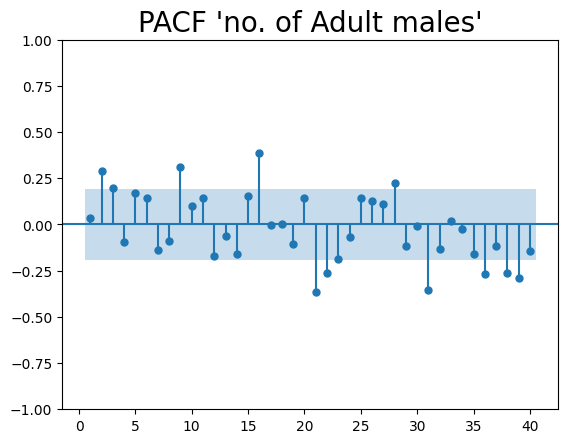

In [ ]:
import statsmodels.graphics.tsaplots as sgt

sgt.plot_pacf(s3['no. of Adult males'] , lags= 40 , zero =False ,  method = ('ols') ) #do not include the actual value
plt.title("PACF 'no. of Adult males'" , size = 20)
plt.show()


#SCELTA DEL MODELLO
###Le condizioni principali per espandere il modello sono:

Efficienza: I coefficienti per il modello più complesso devono
essere significativamente diversi da zero. In altre parole, gli stimatori dei coefficienti devono essere diversi da zero in modo statisticamente significativo.

Parcimonia: Se il modello più semplice fornisce previsioni ragionevoli e i coefficienti sono significativi, è preferibile mantenere il modello più semplice.

Come stabilire la bontà di un modello? Log Likelihood Ratio Test (LLR)

In [ ]:
#define a function for LLR test
from scipy.stats import chi2
def LLR_test(mod_1, mod_2 ,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

# AR

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ar_1 = ARIMA(s3['no. of Adult males'] , order = (1,0,0))  #SIMPLE AR(1) model

# # order (1,0) establish that we are looking at one past value at time and we are not considering residuals

results_ar_1 = model_ar_1.fit()

results_ar_1.summary()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     no. of Adult males   No. Observations:                  106
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -161.869
Date:                Wed, 03 Jan 2024   AIC                            329.738
Time:                        09:38:17   BIC                            337.728
Sample:                    06-15-2023   HQIC                           332.976
                         - 09-28-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4155      0.261      1.590      0.112      -0.097       0.928
ar.L1          0.0332      0.110      0.301      0.763      -0.183       0.249
sigma2         1.2414      0.158      7.858      0.000       0.932       1.551
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               756.00
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               7.07   Skew:                             3.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Il p-value associato è 0.112, che non è statisticamente significativo al livello di confidenza del 95% (poiché è superiore a 0.05). Questo suggerisce che la costante potrebbe non essere significativamente diversa da zero.

# MA

In [ ]:
model_ma_1 = ARIMA(s3['no. of Adult males'][1:],order = (0,0,1))

results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     no. of Adult males   No. Observations:                  105
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -160.728
Date:                Wed, 03 Jan 2024   AIC                            327.455
Time:                        09:38:17   BIC                            335.417
Sample:                    06-16-2023   HQIC                           330.682
                         - 09-28-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4097      0.261      1.570      0.116      -0.102       0.921
ma.L1          0.0199      0.109      0.183      0.855      -0.194       0.233
sigma2         1.2506      0.161      7.792      0.000       0.936       1.565
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               744.44
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               7.19   Skew:                             3.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Il p-value associato è 0.116, che non è statisticamente significativo al livello di confidenza del 95% (poiché è superiore a 0.05). Questo suggerisce che la costante potrebbe non essere significativamente diversa da zero.

#ARMA
###Non possiamo utilizzarlo inquanto No. of Adult males non è stazionario

#ARIMA

In [ ]:
model_ar_1_i_1_ma_1 = ARIMA(s3['no. of Adult males'], order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     no. of Adult males   No. Observations:                  106
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -156.930
Date:                Wed, 03 Jan 2024   AIC                            319.860
Time:                        09:38:17   BIC                            327.822
Sample:                    06-15-2023   HQIC                           323.086
                         - 09-28-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1854      0.103     -1.802      0.072      -0.387       0.016
ma.L1         -0.8425      0.041    -20.329      0.000      -0.924      -0.761
sigma2         1.1461      0.062     18.378      0.000       1.024       1.268
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               718.92
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               6.97   Skew:                             2.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Il p-value associato è 0.072, che è superiore al livello di significatività comune del 5%. Questo suggerisce che il coefficiente potrebbe non essere statisticamente significativo.

# ARIMAX

In [ ]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(s3['no. of Adult males'], exog = s3.temperature_mean, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     no. of Adult males   No. Observations:                  106
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -156.871
Date:                Wed, 03 Jan 2024   AIC                            321.743
Time:                        09:38:18   BIC                            332.358
Sample:                    06-15-2023   HQIC                           326.044
                         - 09-28-2023                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
temperature_mean    -0.0135      0.025     -0.543      0.587      -0.062       0.035
ar.L1               -0.1821      0.105     -1.727      0.084      -0.389       0.025
ma.L1               -0.8472      0.041    -20.641      0.000      -0.928      -0.767
sigma2               1.1446      0.063     18.069      0.000       1.020       1.269
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               703.04
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               6.96   Skew:                             2.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(s3['no. of Adult males'], exog = s3.relativehumidity_mean, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     no. of Adult males   No. Observations:                  106
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -156.225
Date:                Wed, 03 Jan 2024   AIC                            320.450
Time:                        09:38:18   BIC                            331.065
Sample:                    06-15-2023   HQIC                           324.751
                         - 09-28-2023                                         
Covariance Type:                  opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
relativehumidity_mean    -0.0115      0.018     -0.622      0.534      -0.048       0.025
ar.L1                    -0.1882      0.103     -1.835      0.066      -0.389       0.013
ma.L1                    -0.8290      0.043    -19.152      0.000      -0.914      -0.744
sigma2                    1.1316      0.086     13.116      0.000       0.963       1.301
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               653.94
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               6.87   Skew:                             2.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


Il p-value associato al test utilizzando la temperatura come esogeno è 0.587 quello associato al test utilizzando l'umidità come esogeno è 0.534.Sono superiori al livello di significatività comune del 5%. Questo suggerisce che il coefficiente potrebbe non essere statisticamente significativo.

#Forecasting sui modelli precedenti

#####AR

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



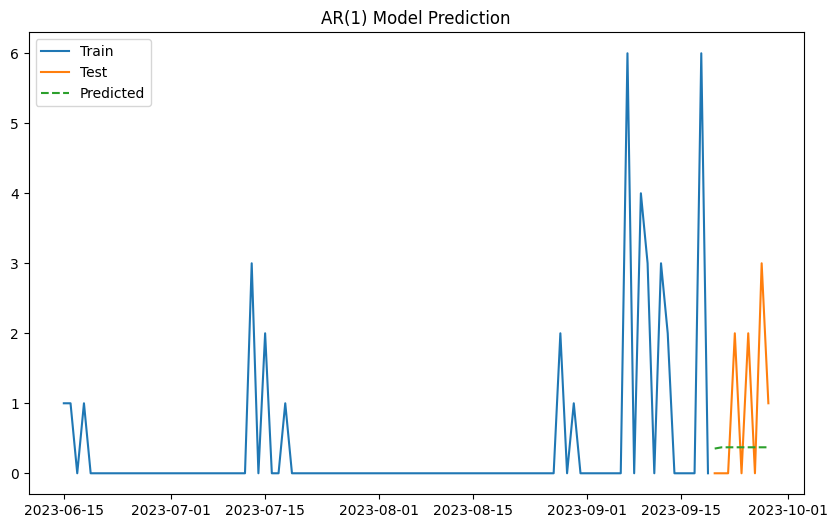

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Divisione del dataset in train e test utilizzando TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

for train_index, test_index in tscv.split(s3):
    train, test = s3.iloc[train_index], s3.iloc[test_index]

# Creazione del modello AR(1) e addestramento su dati di training
model_ar_1 = ARIMA(train['no. of Adult males'], order=(1, 0, 0))
results_ar_1 = model_ar_1.fit()

# Predizione sul set di test
predictions = results_ar_1.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False, typ='levels')

# Confronto dei valori reali con quelli predetti
comparison = pd.DataFrame({'Real': test['no. of Adult males'].values, 'Predicted': predictions.values})
#print(comparison)

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.plot(train['no. of Adult males'], label='Train')
plt.plot(test['no. of Adult males'], label='Test')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.legend()
plt.title('AR(1) Model Prediction')
plt.show()


####MA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



   Real  Predicted
0     0   0.352849
1     0   0.371122
2     0   0.371122
3     2   0.371122
4     0   0.371122
5     2   0.371122
6     0   0.371122
7     3   0.371122
8     1   0.371122


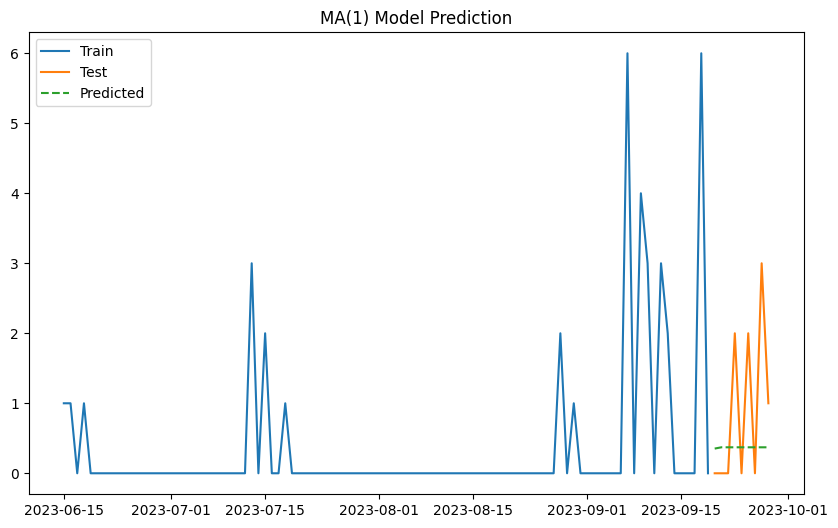

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt



# Divisione del dataset in train e test utilizzando TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

for train_index, test_index in tscv.split(s3):
    train, test = s3.iloc[train_index], s3.iloc[test_index]

# Creazione del modello MA(1) e addestramento su dati di training
model_ma_1 = ARIMA(train['no. of Adult males'], order=(0, 0, 1))
results_ma_1 = model_ma_1.fit()

# Predizione sul set di test
predictions = results_ma_1.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False, typ='levels')

# Confronto dei valori reali con quelli predetti
comparison = pd.DataFrame({'Real': test['no. of Adult males'].values, 'Predicted': predictions.values})
print(comparison)

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.plot(train['no. of Adult males'], label='Train')
plt.plot(test['no. of Adult males'], label='Test')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.legend()
plt.title('MA(1) Model Prediction')
plt.show()


###ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



   Real  Predicted
0     0   1.886363
1     0   1.438441
2     0   1.544801
3     2   1.519546
4     0   1.525543
5     2   1.524119
6     0   1.524457
7     3   1.524377
8     1   1.524396


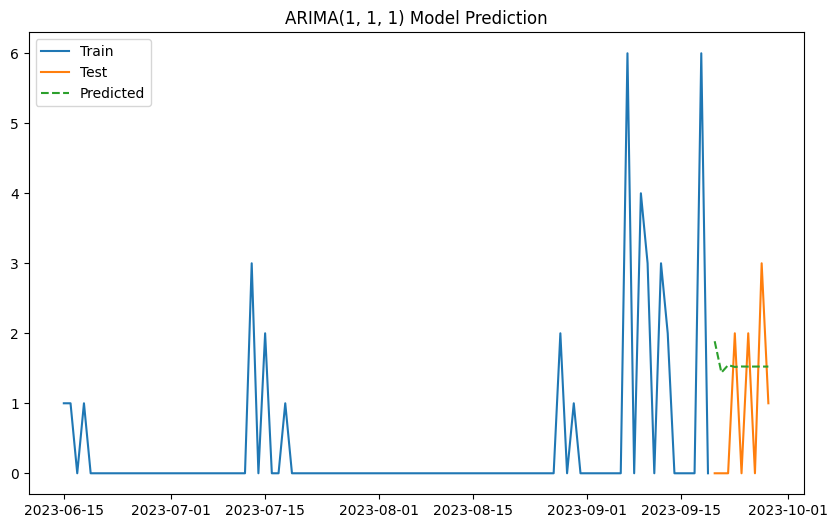

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Divisione del dataset in train e test utilizzando TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

for train_index, test_index in tscv.split(s3):
    train, test = s3.iloc[train_index], s3.iloc[test_index]

# Creazione del modello ARIMA(1, 1, 1) e addestramento su dati di training
model_ar_1_i_1_ma_1 = ARIMA(train['no. of Adult males'], order=(1, 1, 1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()

# Predizione sul set di test
predictions = results_ar_1_i_1_ma_1.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False, typ='levels')

# Confronto dei valori reali con quelli predetti
comparison = pd.DataFrame({'Real': test['no. of Adult males'].values, 'Predicted': predictions.values})
print(comparison)

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.plot(train['no. of Adult males'], label='Train')
plt.plot(test['no. of Adult males'], label='Test')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.legend()
plt.title('ARIMA(1, 1, 1) Model Prediction')
plt.show()


###ARIMAX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



   Real  Predicted
0     0   2.015866
1     0   1.578766
2     0   1.782883
3     2   1.711995
4     0   1.596871
5     2   1.612817
6     0   1.615169
7     3   1.599586
8     1   1.583713


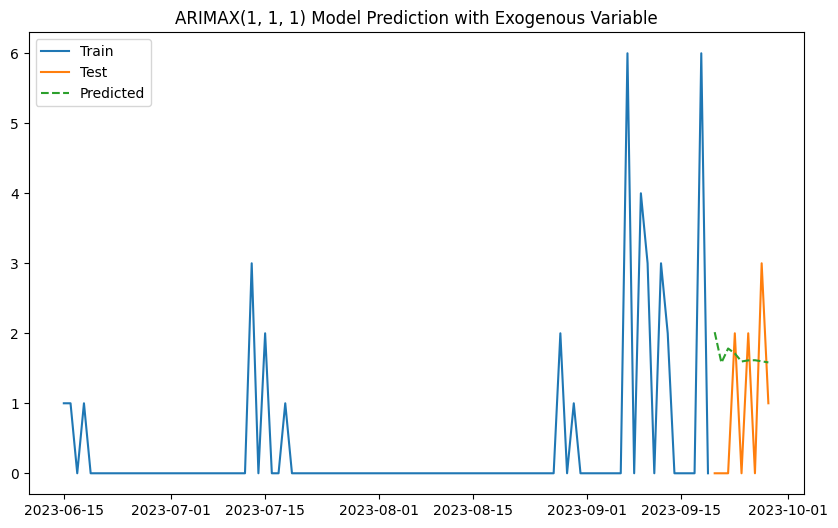

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Divisione del dataset in train e test utilizzando TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

for train_index, test_index in tscv.split(s3):
    train, test = s3.iloc[train_index], s3.iloc[test_index]

# Creazione del modello ARIMA(1, 1, 1) con esogeno e addestramento su dati di training
model_ar_1_i_1_ma_1_Xspx = ARIMA(train['no. of Adult males'], exog=train['temperature_mean'], order=(1, 1, 1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()

# Predizione sul set di test
predictions = results_ar_1_i_1_ma_1_Xspx.predict(start=len(train), end=len(train) + len(test) - 1, exog=test['temperature_mean'], dynamic=False, typ='levels')

# Confronto dei valori reali con quelli predetti
comparison = pd.DataFrame({'Real': test['no. of Adult males'].values, 'Predicted': predictions.values})
print(comparison)

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.plot(train['no. of Adult males'], label='Train')
plt.plot(test['no. of Adult males'], label='Test')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.legend()
plt.title('ARIMAX(1, 1, 1) Model Prediction with Exogenous Variable')
plt.show()


#DEEP LEARNING

###MLP

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


df = s3

# Preprocessing and Creating Lagged Features
def create_lagged_features(df, n_lags):
    lagged_df = df.copy()
    for i in range(1, n_lags + 1):
        lagged_df[f'lag_{i}'] = lagged_df['no. of Adult males'].shift(i)
    lagged_df = lagged_df.dropna()
    return lagged_df

#for i in range (1,20):
n_lags = 9  # Number of lags (can be tuned)
lagged_df = create_lagged_features(df, n_lags)

# Splitting Data
X = lagged_df[[f'lag_{i}' for i in range(1, n_lags + 1)]]
y = lagged_df['no. of Adult males']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definire il modello MLP con la regolarizzazione L2 (alpha) e relu nell'ultimo strato
mlp = MLPRegressor(
      hidden_layer_sizes=(5, 30),
      activation='relu',
      alpha=0.001,  # Aggiungi un parametro di regolarizzazione per ridurre l'overfitting
      max_iter=5000,  # Potrebbe essere necessario un numero maggiore di iterazioni per la convergenza
      random_state=42  # Per la riproducibilità dei risultati
    )

  # Addestrare il modello
mlp.fit(X_train_scaled, y_train)

# Valutare il modello
y_pred = mlp.predict(X_test_scaled)

# Impostare tutti i valori negativi a 0
y_pred = np.maximum(0, y_pred)

# Calcolare il Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 2.9671230458513103


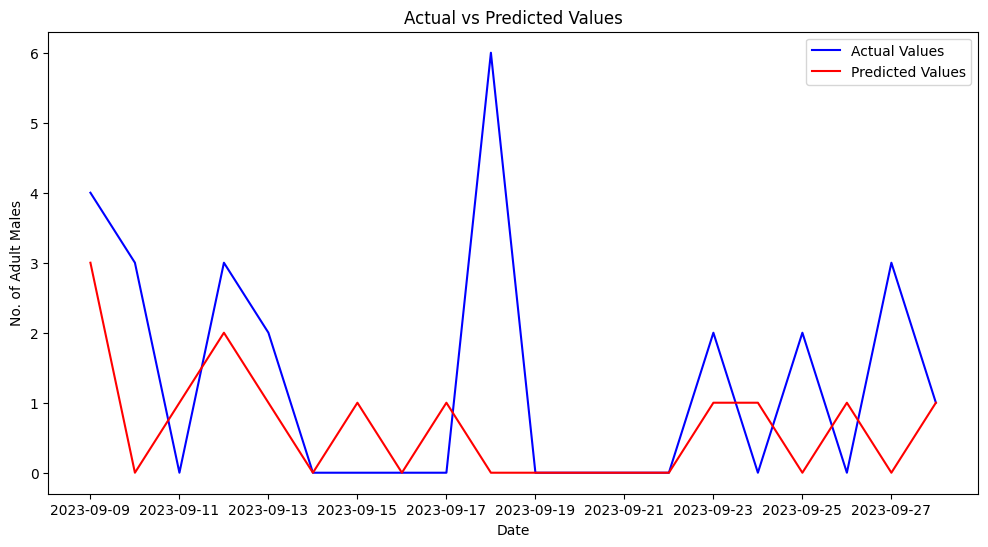

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred and y_test are available from the previous step
# y_test and y_pred should be of the same length
# y_pred = mlp.predict(X_test_scaled) from the previous step
# y_test from the previous step

# Plotting the predicted values against the actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Values', color='blue')
plt.plot(y_test.index, y_pred.round(), label='Predicted Values', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('No. of Adult Males')
plt.legend()
plt.show()



###LSTM

Epoch 1/2000
6/6 [==============================] - 6s 7ms/step - loss: 0.0267
Epoch 2/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0249
Epoch 3/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0241
Epoch 4/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0231
Epoch 5/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0215
Epoch 6/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0231
Epoch 7/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0212
Epoch 8/2000
6/6 [==============================] - 0s 7ms/step - loss: 0.0216
Epoch 9/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0215
Epoch 10/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0211
Epoch 11/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0214
Epoch 12/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0224
Epoch 13/2000
6/6 [==============================

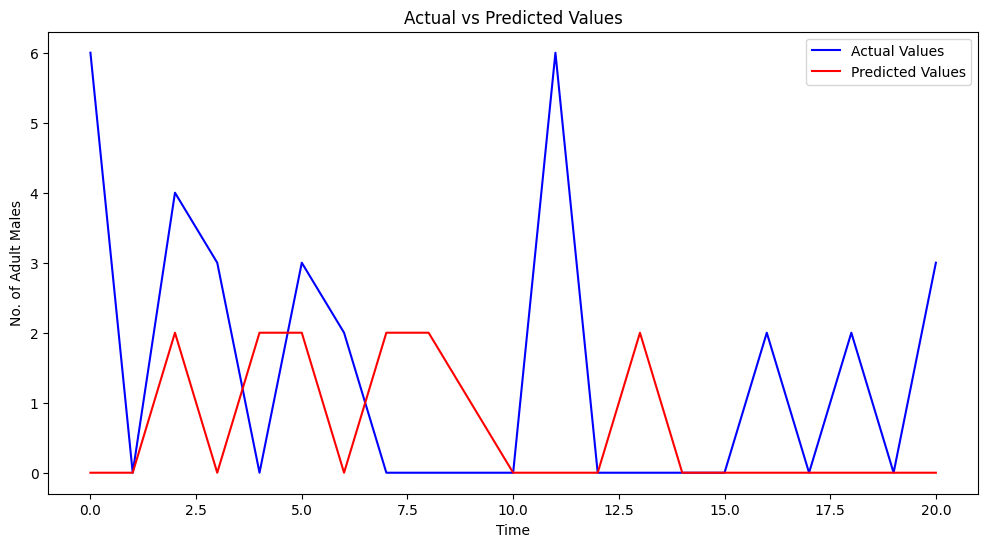

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your data
# df = pd.read_excel('your_dataset.xlsx')

# Assuming 'no. of Adult males' is the target variable
# Assuming df is already loaded with your data

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['no. of Adult males']].values)

# Create lagged dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3  # Number of lagged features
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM

# Split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Define LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences= True, input_shape=(look_back, 1)))
model.add(LSTM(150))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=2000, batch_size=16, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Invert predictions
y_pred = scaler.inverse_transform(y_pred).round()

y_test = scaler.inverse_transform([y_test])



# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(y_test[0], label='Actual Values', color='blue')
plt.plot(y_pred[:,0], label='Predicted Values', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('No. of Adult Males')
plt.legend()
plt.show()


#Regressione Lineare
**Addestramento del Modello di Regressione Lineare**<br>
Prepariamo i dati per la regressione lineare. Utilizzeremo "temperature_mean" e "relativehumidity_mean" come variabili indipendenti per prevedere "no. of Adult males".

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Variabili indipendenti e dipendente
X = s3[['temperature_mean', 'relativehumidity_mean']]  # Variabili indipendenti
y = s3['no. of Adult males']  # Variabile dipendente

# Divisione dei dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Addestramento del modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Previsione dei valori sul set di test e calcolo dell'errore quadratico medio (RMSE)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred.round())
rmse = np.sqrt(mse)

rmse

1.5521246435421703

**Previsioni su Sheet1 Utilizzando il Modello Addestrato su Sheet3**<br>
Ora, useremo il modello di regressione lineare, precedentemente addestrato sul foglio "Sheet3", per prevedere il numero di adulti maschi nel foglio "Sheet1". Per queste previsioni, utilizzeremo le colonne "temperature_mean" e "relativehumidity_mean".

In [ ]:
# Preparazione dei dati di Sheet1 per la previsione (primi 20 record)
X_sheet1_for_prediction = s1[['temperature_mean', 'relativehumidity_mean']].head(20)

# Effettuare le previsioni utilizzando il modello addestrato
predicted_adult_males_sheet1 = model.predict(X_sheet1_for_prediction)

# Creare un DataFrame per visualizzare i risultati
predictions_sheet1_df = X_sheet1_for_prediction.copy()
predictions_sheet1_df['Predicted no. of Adult males'] = predicted_adult_males_sheet1

# Visualizzazione delle prime 20 previsioni
predictions_sheet1_df['Predicted no. of Adult males'] = predictions_sheet1_df['Predicted no. of Adult males'].round()

predictions_sheet1_df

,temperature_mean,relativehumidity_mean,Predicted no. of Adult males
Date,,,
2022-01-01,11.22,77,2.0
2022-01-02,9.87,86,2.0
2022-01-03,9.33,79,2.0
2022-01-04,11.05,72,2.0
2022-01-05,10.17,73,2.0
2022-01-06,5.13,84,3.0
2022-01-07,3.89,77,3.0
2022-01-08,1.87,71,4.0
2022-01-09,1.40,84,4.0
